In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

In [2]:
ldpdf = pd.read_csv('../K1_mi10_LDP.csv')
ldpdf.head()

,mi,Erm/Sci,Scm/Po,Distance,X*,R*,u0*,u*,Ur,strain
0,10,22.95,0.1,-12,-2.4,5.74,0.140913,0.012783,0.040907,0.818134
1,10,22.95,0.1,-11,-2.2,5.74,0.140913,0.015614,0.049964,0.999271
2,10,22.95,0.1,-10,-2.0,5.74,0.140913,0.019071,0.061026,1.220512
3,10,22.95,0.1,-9,-1.8,5.74,0.140913,0.023293,0.074537,1.490737
4,10,22.95,0.1,-8,-1.6,5.74,0.140913,0.028450,0.091040,1.820791


In [3]:
x = ldpdf[['Erm/Sci','Scm/Po','X*']].values
y = ldpdf[['strain']].values
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (2745, 3) (2745, 1)
Test set: (687, 3) (687, 1)


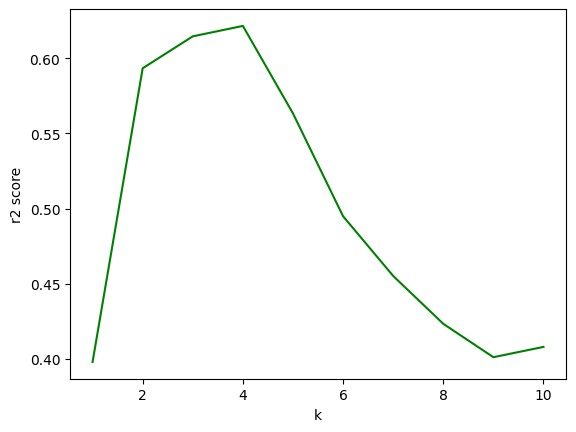

In [5]:
k=1
r2atk= np.zeros(10)
maek = np.zeros(10)
msek = np.zeros(10)

for k in range(1,11):
    knn_regk = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn_regk.fit(x_train, y_train)
    yhat = knn_regk.predict(x_test)
    r2atk[k-1]=r2_score(y_test,yhat)
    maek[k-1] = mean_absolute_error(y_test, yhat)
    msek[k-1] = mean_squared_error(y_test, yhat)

plt.plot(range(1,11), r2atk, 'g')
plt.xlabel('k')
plt.ylabel('r2 score')
plt.show()


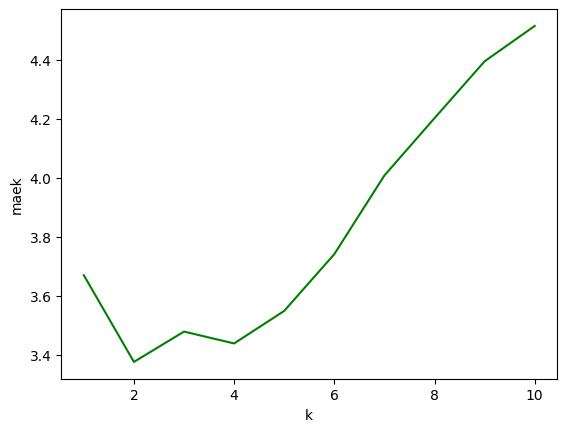

In [6]:
plt.plot(range(1,11), maek, 'g')
plt.xlabel('k')
plt.ylabel('maek')
plt.show()

In [12]:
print("R^2 score for k=3:", r2atk[3])
print("MAE score for k=3:", maek[3])
print("MSE score for k=3:", msek[3])

R^2 score for k=3: 0.6214933970583156
MAE score for k=3: 3.4393470400287485
MSE score for k=3: 45.37198779520358


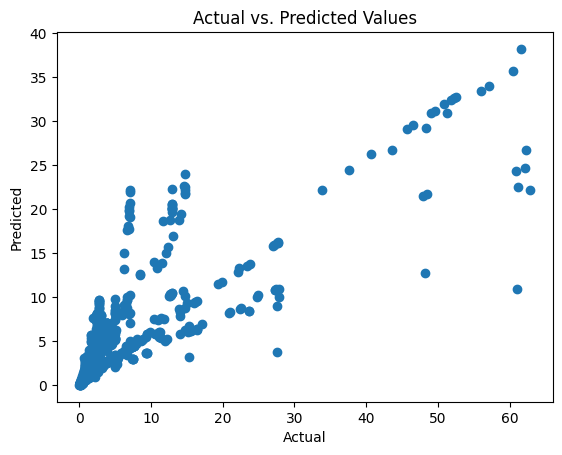

In [14]:
k=4    
knn_regk = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
knn_regk.fit(x_train, y_train)
yhat = knn_regk.predict(x_test)
r2atk[k-1]=r2_score(y_test,yhat)
maek[k-1] = mean_absolute_error(y_test, yhat)
msek[k-1] = mean_squared_error(y_test, yhat)

plt.scatter(y_test, yhat)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()